In [1]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
nsamp=100

In [6]:
data_pos = np.concatenate((np.random.multivariate_normal([0,0],np.eye(2)*0.01,size=nsamp),np.ones((nsamp,1))),axis=1)
data_neg = np.concatenate((np.random.multivariate_normal([0.4,0.4],np.eye(2)*0.01,size=nsamp),np.zeros((nsamp,1))),axis=1)
data=np.concatenate((data_pos,data_neg))
X=data[:,:-1]
Y=data[:,-1]

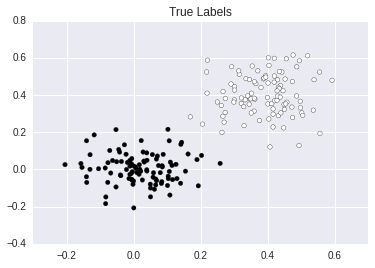

In [7]:
plt.scatter(data[:,0],data[:,1],c=data[:,-1])
plt.title("True Labels")

In [8]:
lr = LogisticRegression()
lr.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [309]:
true_coeff = lr.coef_
true_int = np.expand_dims(lr.intercept_,1)
true_w = np.concatenate((true_coeff,true_int),axis=1).flatten()


$$w_t \propto \frac{p(y_t|x_t,d_{1:t-1},r_{0:t})p(r_t|r_{t-1})}{q(r_t|r_{0:t-1},d_{1:t})}$$

In [310]:
def logistic_function(X,w):
    lin = np.matmul(X,w[:-1])+w[-1]
    return 1./(1.+np.exp(-lin))

def log_prob(X,Y,w):
    indiv_probs = [x if z==1 else (1-x) for x,z in zip(logistic_function(X,w),Y)]
    prob =  np.sum(np.log((indiv_probs)))
    return prob

def proposal(last_p):
    return np.random.multivariate_normal(last_p,np.eye(len(last_p)))

def softmax(vec):
    xform = np.exp(vec)
    xform = xform/sum(xform)
    return xform

In [311]:
w = np.ones((X.shape[1]+1))
N=20000
w_mat=np.ones((N,len(w)))
weight_mat =np.ones(N)

In [312]:
for i in xrange(N):
    w_mat[i]=w
    weight_mat[i]=log_prob(X,Y,w)
    w = proposal(w)

In [313]:
weight_mat_sm = softmax(weight_mat)

In [314]:
resamped = np.random.multinomial(N,weight_mat_sm)
resamp_indices = ([[i]*x for i,x in enumerate(resamped) if x>0])
resamp_indices = np.array([ind for inds in resamp_indices for ind in inds])

In [318]:
estimated_params = np.mean(w_mat[resamp_indices],axis=0)
print estimated_params

[-35.06594484  -5.80046486   8.85274491]


In [323]:
preds = [1 if x>=0.5 else 0 for x in logistic_function(X,estimated_params)]
print "Accuracy: %.3f"%(float(sum(preds==Y))/len(Y))

Accuracy: 0.985


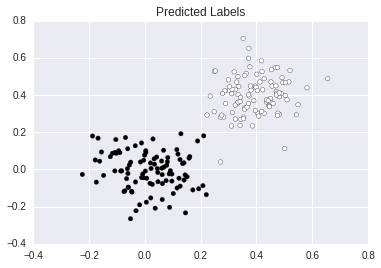

In [331]:
plt.scatter(data[:,0],data[:,1],c=preds)
plt.title("Predicted Labels")